cx 0 3
cx 2 5

Resultados de las mediciones:
{'000': 264, '001': 250, '101': 265, '100': 245}

El valor secreto s encontrado es: 010


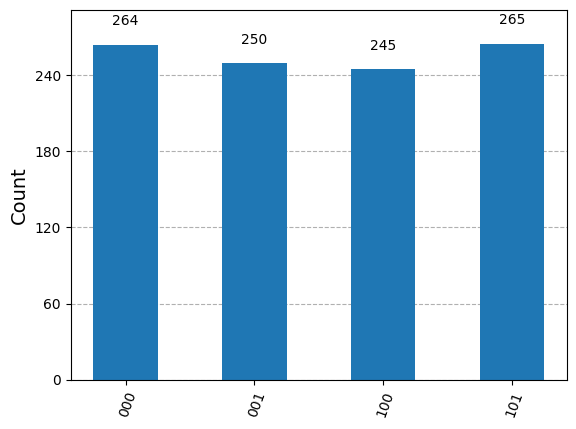

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
from scipy.linalg import null_space

def simon_oracle(n, s):
    qc = QuantumCircuit(2 * n)
    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(i, n + i)
            print("cx", i, n + i)    
    return qc

def simon_algorithm(n, s):
    """ Implementación del algoritmo de Simon en Qiskit """
    qc = QuantumCircuit(2 * n, n)
    qc.h(range(n))
    oracle = simon_oracle(n, s)
    qc.append(oracle, range(2 * n))
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

def solve_simon(n, s, shots=1024):
    qc = simon_algorithm(n, s)
    backend = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, backend)
    result = backend.run(transpiled_qc, shots=shots).result()
    counts = result.get_counts()
    equations = np.array([list(map(int, key)) for key in counts.keys()])
    s_solution = null_space(equations % 2).T[0] % 2
    s_str = ''.join(str(int(bit)) for bit in s_solution)
    return counts, s_str, qc


n = 3
s = "101" 
counts, found_s, qc = solve_simon(n, s)
print("\nResultados de las mediciones:")
print(counts)
print(f"\nEl valor secreto s encontrado es: {found_s}")

plot_histogram(counts)

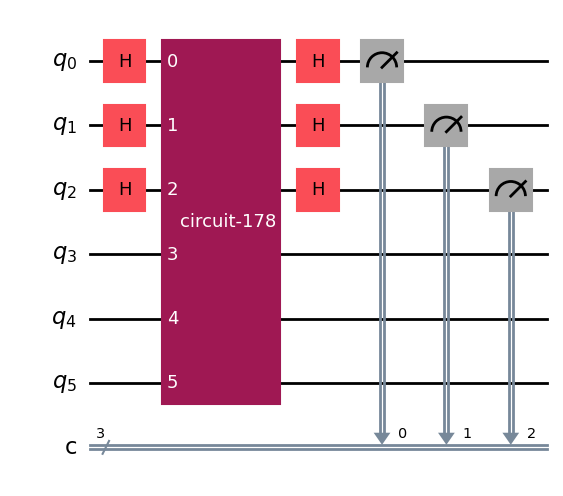

In [6]:
qc.draw("mpl")